<a href="https://colab.research.google.com/github/tsubametsai/Comparison-of-the-Cluster-of-the-Automobile-Industry-between-Taiwan-and-Japan-data-set/blob/main/Cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#台灣地區數據分析開始

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [ ]:
Taiwan_data_url = "https://raw.githubusercontent.com/tsubametsai/Comparison-of-the-Cluster-of-the-Automobile-Industry-between-Taiwan-and-Japan-data-set/main/Taiwandata.csv"
command = lambda: Openurl(url)


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/tsubametsai/Comparison-of-the-Cluster-of-the-Automobile-Industry-between-Taiwan-and-Japan-data-set/main/Taiwandata.csv")
df.index = df['Unnamed: 0']
df.head()

,Unnamed: 0,NIC,NIE,TPE,UR,PO 15y,QOF,EP,UP,NLF
Unnamed: 0,,,,,,,,,,
NewTaipeiCity,NewTaipeiCity,412,8026,3390,3.8,3493,2070,1991,79,1424
TaipeiCity,TaipeiCity,23,176,4053,3.7,2293,1336,1286,50,957
Taoyuan,Taoyuan,461,25085,7899,3.8,1876,1074,1033,41,802
TaichungCity,TaichungCity,464,11267,3628,3.7,2381,1384,1333,52,996
TainanCity,TainanCity,567,24577,3676,3.7,1631,1030,991,38,602


In [ ]:
df = df.iloc[:, 1:11]
df.head()

,NIC,NIE,TPE,UR,PO 15y,QOF,EP,UP,NLF
Unnamed: 0,,,,,,,,,
NewTaipeiCity,412,8026,3390,3.8,3493,2070,1991,79,1424
TaipeiCity,23,176,4053,3.7,2293,1336,1286,50,957
Taoyuan,461,25085,7899,3.8,1876,1074,1033,41,802
TaichungCity,464,11267,3628,3.7,2381,1384,1333,52,996
TainanCity,567,24577,3676,3.7,1631,1030,991,38,602


In [ ]:
df.index.name = None
df.head()

,NIC,NIE,TPE,UR,PO 15y,QOF,EP,UP,NLF
NewTaipeiCity,412,8026,3390,3.8,3493,2070,1991,79,1424
TaipeiCity,23,176,4053,3.7,2293,1336,1286,50,957
Taoyuan,461,25085,7899,3.8,1876,1074,1033,41,802
TaichungCity,464,11267,3628,3.7,2381,1384,1333,52,996
TainanCity,567,24577,3676,3.7,1631,1030,991,38,602


In [ ]:
#檢測是否有重複數值(必須為0)
df.duplicated().sum()

0

In [ ]:
#檢測是否有缺失值(必須為0)
df.isnull().sum()

NIC       0
NIE       0
TPE       0
UR        0
PO 15y    0
QOF       0
EP        0
UP        0
NLF       0
dtype: int64

In [ ]:
#輸出行與列的總數，19個縣市，9個特徵值
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, NewTaipeiCity to ChiayiCity
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NIC     19 non-null     int64  
 1   NIE     19 non-null     int64  
 2   TPE     19 non-null     int64  
 3   UR      19 non-null     float64
 4   PO 15y  19 non-null     int64  
 5   QOF     19 non-null     int64  
 6   EP      19 non-null     int64  
 7   UP      19 non-null     int64  
 8   NLF     19 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 1.5+ KB


In [ ]:
#敘述性統計
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NIC,19.0,145.210526,195.565726,0.0,15.0,41.0,266.0,567.0
NIE,19.0,5264.842105,7725.672788,0.0,283.5,1897.0,6356.5,25085.0
TPE,19.0,4750.736842,3870.984727,0.0,3186.0,3676.0,4876.0,16944.0
UR,19.0,3.705263,0.062126,3.6,3.7,3.7,3.7,3.8
PO 15y,19.0,1057.894737,980.440485,186.0,380.5,473.0,1753.5,3493.0
QOF,19.0,626.368421,575.177095,111.0,229.0,284.0,1052.0,2070.0
EP,19.0,602.894737,553.445661,107.0,220.5,273.0,1012.0,1991.0
UP,19.0,23.421053,21.698223,4.0,8.5,11.0,39.5,79.0
NLF,19.0,431.526316,406.237392,76.0,151.5,196.0,702.0,1424.0


In [ ]:
df.index.value_counts()

HsinchuCity      1
Yunlin           1
TaipeiCity       1
KeelungCity      1
Taoyuan          1
Yilan            1
Nantou           1
Chiayi           1
ChiayiCity       1
NewTaipeiCity    1
Miaoli           1
TainanCity       1
Taitung          1
Changhua         1
Hsinchu          1
KaohsiungCity    1
Hualien          1
TaichungCity     1
Pingtung         1
dtype: int64

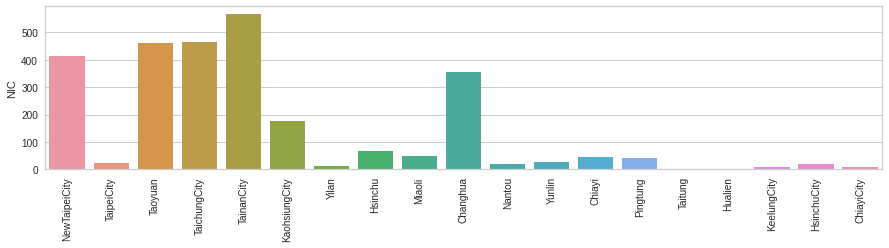

In [ ]:
#顯示毎個縣市的特徵值圖表
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['NIC'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

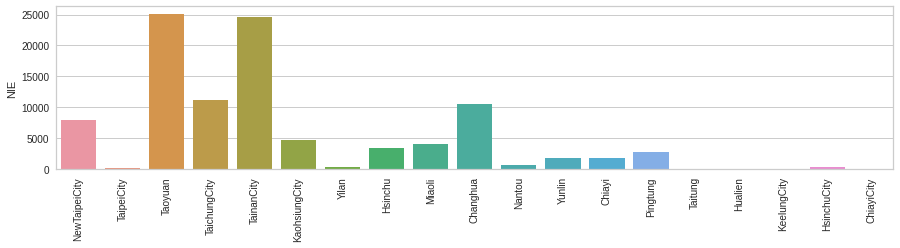

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['NIE'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

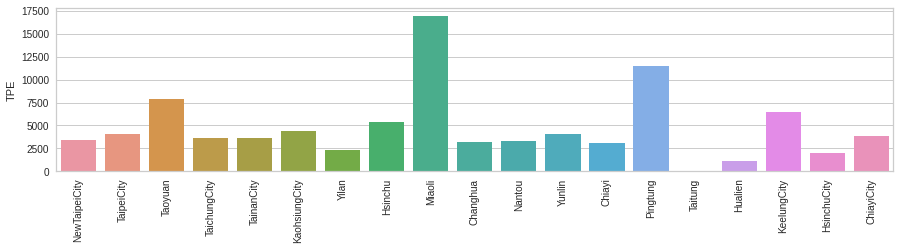

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['TPE'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

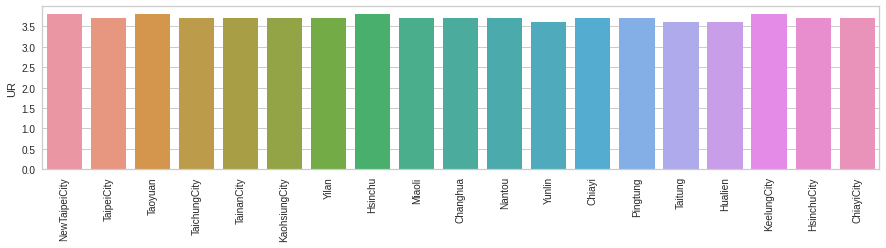

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['UR'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

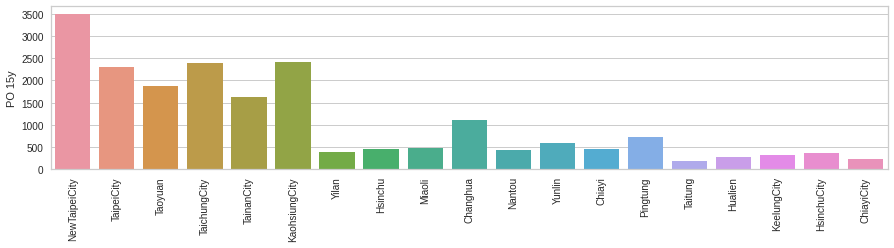

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['PO 15y'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

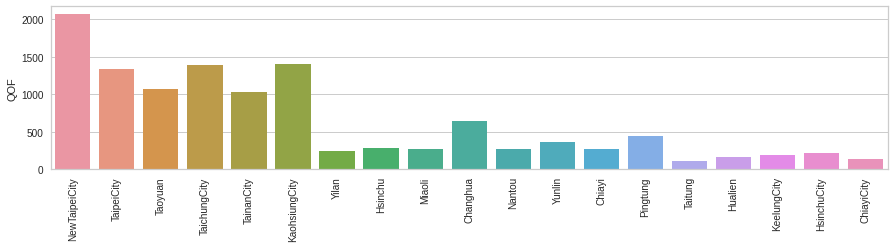

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['QOF'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

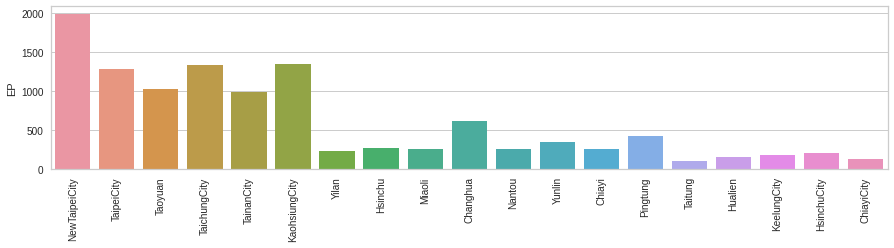

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['EP'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

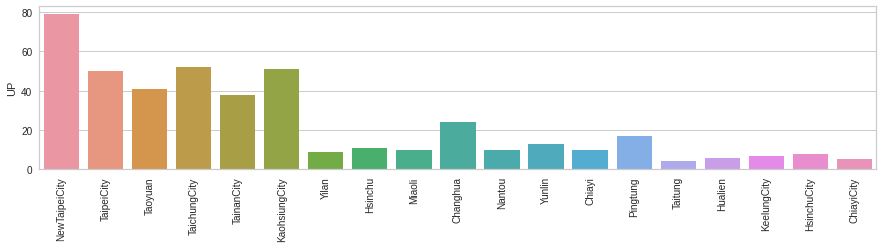

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['UP'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

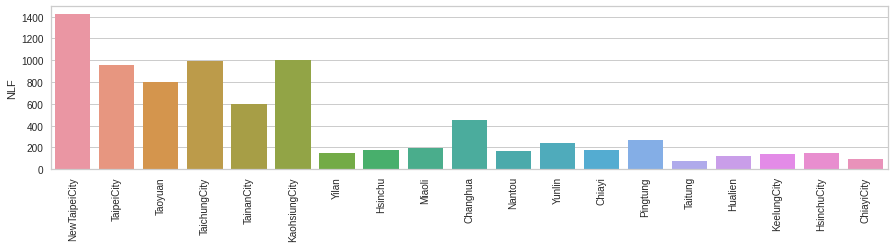

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['NLF'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

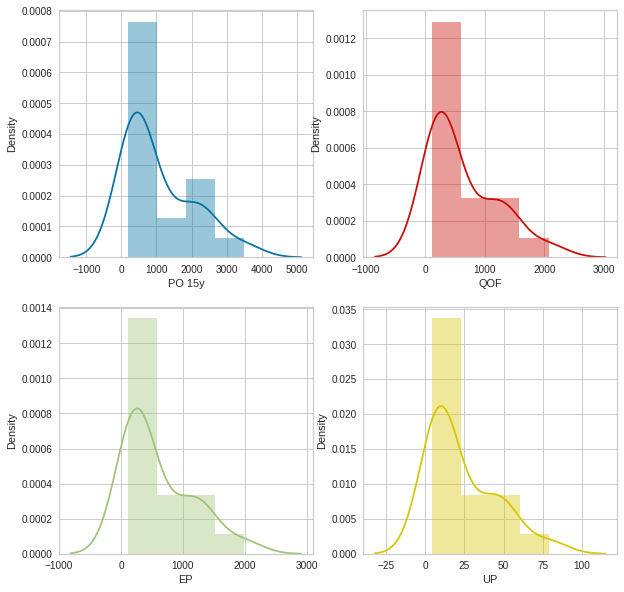

In [ ]:
#分佈分析
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.distplot(df['PO 15y'], ax=axs[0,0])
sns.distplot(df['QOF'], color = 'r', ax=axs[0,1])
sns.distplot(df['EP'], color = 'g', ax=axs[1,0])
sns.distplot(df['UP'], color = 'y', ax=axs[1,1])

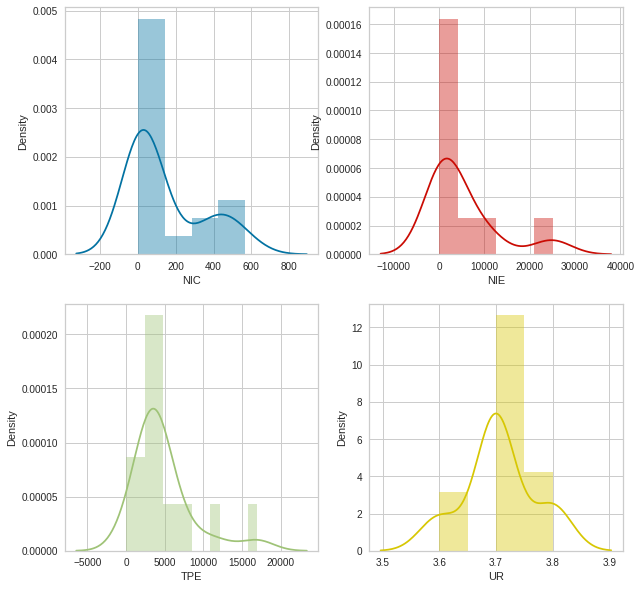

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.distplot(df['NIC'], ax=axs[0,0])
sns.distplot(df['NIE'], color = 'r', ax=axs[0,1])
sns.distplot(df['TPE'], color = 'g', ax=axs[1,0])
sns.distplot(df['UR'], color = 'y', ax=axs[1,1])

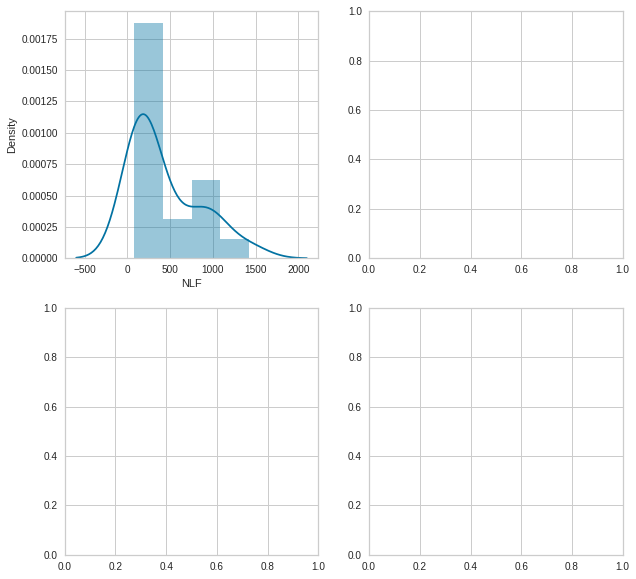

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.distplot(df['NLF'], ax=axs[0,0])

In [ ]:
# 使用夏皮羅檢驗法檢測正態性
# H0：分佈是正態的
# H1：分佈非正態
# Test Statistics 越趨近1擬和越好，P-value 小於0.05為非常態分佈
from scipy.stats import shapiro

In [ ]:
test_statistics, p_value = shapiro(df['NIC'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.719697892665863
P-value:  9.635723836254328e-05


In [ ]:
test_statistics, p_value = shapiro(df['NIE'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.6983703374862671
P-value:  5.3163992561167106e-05


In [ ]:
test_statistics, p_value = shapiro(df['TPE'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.779542863368988
P-value:  0.000585248984862119


In [ ]:
test_statistics, p_value = shapiro(df['UR'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.7783238887786865
P-value:  0.0005628848448395729


In [ ]:
test_statistics, p_value = shapiro(df['PO 15y'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.8010533452033997
P-value:  0.001183865126222372


In [ ]:
test_statistics, p_value = shapiro(df['QOF'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.8052462339401245
P-value:  0.0013634050264954567


In [ ]:
test_statistics, p_value = shapiro(df['EP'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.805294930934906
P-value:  0.0013656523078680038


In [ ]:
test_statistics, p_value = shapiro(df['UP'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.8039894104003906
P-value:  0.001306722522713244


In [ ]:
test_statistics, p_value = shapiro(df['NLF'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.7916443347930908
P-value:  0.0008664125925861299


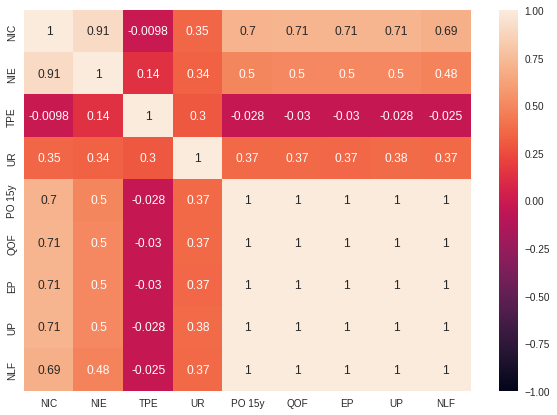

In [ ]:
# 特徵值之間的相關係數
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1);

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

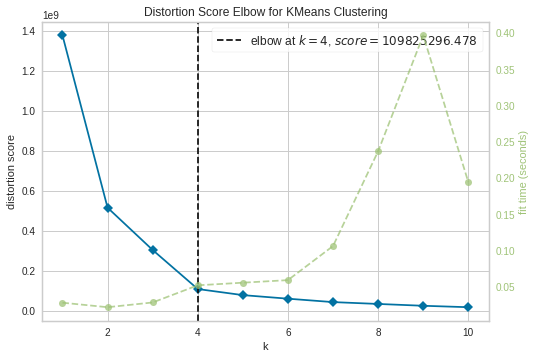

In [ ]:
#找到最佳的群聚數（群聚之間的最小相似度和群聚之間的最大相似度)
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (1,11))
visualizer.fit(df)
visualizer.poof()

In [ ]:
# 最終模型計算
# K均值分析，找到最佳群聚數為4個
# 群聚中心距離值越大表示分群效果越好，平方和越小越好
kmeans = KMeans(n_clusters = 4).fit(df)
print("Number of clusters: ", kmeans.n_clusters)
print("-"*70)
print("Cluster Centers: ", '\n', kmeans.cluster_centers_)

Number of clusters:  4
----------------------------------------------------------------------
Cluster Centers:  
 [[5.14000000e+02 2.48310000e+04 5.78750000e+03 3.75000000e+00
  1.75350000e+03 1.05200000e+03 1.01200000e+03 3.95000000e+01
  7.02000000e+02]
 [3.41666667e+01 1.14600000e+03 3.33358333e+03 3.69166667e+00
  7.02500000e+02 4.14583333e+02 3.99166667e+02 1.53333333e+01
  2.87916667e+02]
 [4.10000000e+02 9.92833333e+03 3.42200000e+03 3.73333333e+00
  2.32433333e+03 1.36733333e+03 1.31600000e+03 5.16666667e+01
  9.57000000e+02]
 [4.55000000e+01 3.41650000e+03 1.42100000e+04 3.70000000e+00
  5.95000000e+02 3.60000000e+02 3.46500000e+02 1.35000000e+01
  2.34500000e+02]]


In [ ]:
labels = kmeans.labels_
labels

array([2, 1, 0, 2, 0, 1, 1, 1, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1],
      dtype=int32)

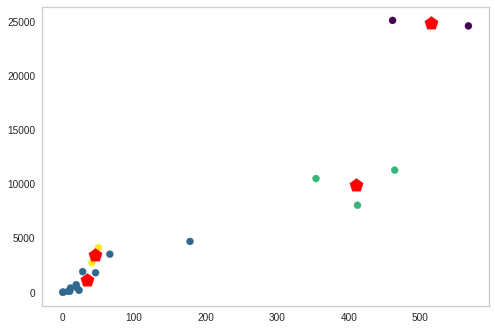

In [ ]:
# 繪製毎個群聚的中心點之距離
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = 'Red', s = 200, marker = 'p')
plt.grid()
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

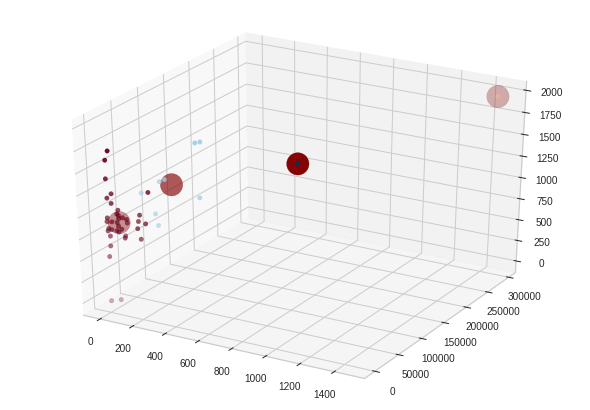

In [ ]:
# 將數據以3D圖顯示
fig = plt.figure()
ax = Axes3D(fig)
x = df.iloc[:,0]
y = df.iloc[:,1]
z = df.iloc[:,2]
ax.scatter(x, y, z, c = labels,  cmap = 'RdBu')
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c ="#840303", marker="o", s = 500);

In [ ]:
#顯示狀態和狀態所屬的群聚
clustered_df = pd.DataFrame({'States': df.index,
                             'Clusters': labels})
clustered_df.head()

,States,Clusters
0,NewTaipeiCity,2
1,TaipeiCity,1
2,Taoyuan,0
3,TaichungCity,2
4,TainanCity,0


In [ ]:
#分別顯示群聚
clustered_df.sort_values(by = 'Clusters')

,States,Clusters
2,Taoyuan,0
4,TainanCity,0
18,ChiayiCity,1
1,TaipeiCity,1
16,KeelungCity,1
5,KaohsiungCity,1
6,Yilan,1
7,Hsinchu,1
15,Hualien,1
17,HsinchuCity,1


In [ ]:
# 日本地區數據分析開始

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
Japan_data_url = "https://raw.githubusercontent.com/tsubametsai/Comparison-of-the-Cluster-of-the-Automobile-Industry-between-Taiwan-and-Japan-data-set/main/Japandata.csv"
command = lambda: Openurl(url)

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/tsubametsai/Comparison-of-the-Cluster-of-the-Automobile-Industry-between-Taiwan-and-Japan-data-set/main/Japandata.csv")
df.index = df['Unnamed: 0']
df.head()

,Unnamed: 0,NIC,NIE,TPE,UR,PO 15y,QOF,EP,UP,NLF
Unnamed: 0,,,,,,,,,,
Hokkaido,Hokkaido,47,8108,1052.00,2.6,4688,2728,2658,70,1958
Aomori,Aomori,6,107,0.57,2.5,1115,667,650,17,447
Iwate,Iwate,41,7761,0.80,2.1,1092,677,663,14,414
Miyagi,Miyagi,70,9096,970.00,2.5,2035,1255,1224,32,779
Akita,Akita,22,2453,838.00,2.8,874,504,490,14,370


In [ ]:
df = df.iloc[:, 1:11]
df.head()

,NIC,NIE,TPE,UR,PO 15y,QOF,EP,UP,NLF
Unnamed: 0,,,,,,,,,
Hokkaido,47,8108,1052.00,2.6,4688,2728,2658,70,1958
Aomori,6,107,0.57,2.5,1115,667,650,17,447
Iwate,41,7761,0.80,2.1,1092,677,663,14,414
Miyagi,70,9096,970.00,2.5,2035,1255,1224,32,779
Akita,22,2453,838.00,2.8,874,504,490,14,370


In [ ]:
df.index.name = None
df.head()

,NIC,NIE,TPE,UR,PO 15y,QOF,EP,UP,NLF
Hokkaido,47,8108,1052.00,2.6,4688,2728,2658,70,1958
Aomori,6,107,0.57,2.5,1115,667,650,17,447
Iwate,41,7761,0.80,2.1,1092,677,663,14,414
Miyagi,70,9096,970.00,2.5,2035,1255,1224,32,779
Akita,22,2453,838.00,2.8,874,504,490,14,370


In [ ]:
#檢測是否有重複數值(必須為0)
df.duplicated().sum()

0

In [ ]:
#檢測是否有缺失值(必須為0)
df.isnull().sum()

NIC       0
NIE       0
TPE       0
UR        0
PO 15y    0
QOF       0
EP        0
UP        0
NLF       0
dtype: int64

In [ ]:
#輸出行與列的總數，47個都道府縣，9個特徵值
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Hokkaido to Okinawa
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NIC     47 non-null     int64  
 1   NIE     47 non-null     int64  
 2   TPE     47 non-null     float64
 3   UR      47 non-null     float64
 4   PO 15y  47 non-null     int64  
 5   QOF     47 non-null     int64  
 6   EP      47 non-null     int64  
 7   UP      47 non-null     int64  
 8   NLF     47 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 3.7+ KB


In [ ]:
#敘述性統計
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NIC,47.0,144.595745,253.297012,4.00,20.0,60.0,166.00,1467.0
NIE,47.0,18940.787234,44459.793459,40.00,2101.0,7587.0,15092.00,294879.0
TPE,47.0,1030.220638,394.006441,0.57,845.5,958.0,1221.50,1957.0
UR,47.0,2.093617,0.396947,1.20,1.9,2.1,2.35,2.9
PO 15y,47.0,2360.021277,2451.236516,486.00,943.5,1391.0,2365.50,12343.0
QOF,47.0,1465.872340,1584.615913,305.00,582.0,818.0,1437.50,8254.0
EP,47.0,1433.404255,1546.975502,299.00,572.5,797.0,1404.00,8061.0
UP,47.0,32.574468,38.180774,6.00,10.0,17.0,34.00,193.0
NLF,47.0,892.212766,870.866833,181.00,369.0,561.0,925.00,4077.0


In [ ]:
df.index.value_counts()

Kanagawa     1
Tottori      1
Fukui        1
Kagoshima    1
Gunma        1
Wakayama     1
Yamaguchi    1
Toyama       1
Fukushima    1
Ishikawa     1
Ehime        1
Saga         1
Aichi        1
Akita        1
Nara         1
Miyagi       1
Nagano       1
Niigata      1
Oita         1
Hokkaido     1
Kochi        1
Okinawa      1
Iwate        1
Nagasaki     1
Saitama      1
Shimane      1
Yamagata     1
Tokushima    1
Ibaraki      1
Kyoto        1
Gifu         1
Kumamoto     1
Tokyo        1
Hiroshima    1
Shiga        1
Okayama      1
Osaka        1
Hyogo        1
Yamanashi    1
Chiba        1
Miyazaki     1
Mie          1
Aomori       1
Kagawa       1
Fukuoka      1
Tochigi      1
Shizuoka     1
dtype: int64

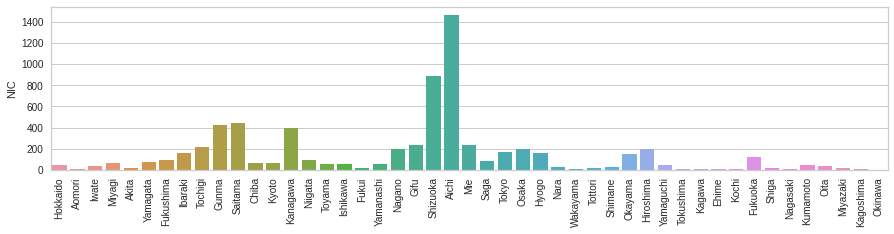

In [ ]:
#顯示毎個縣市的特徵值圖表
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['NIC'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);


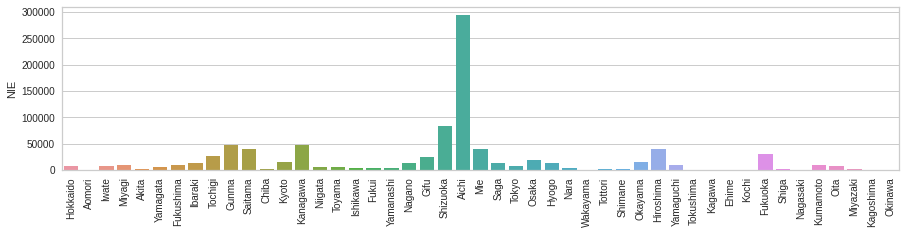

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['NIE'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

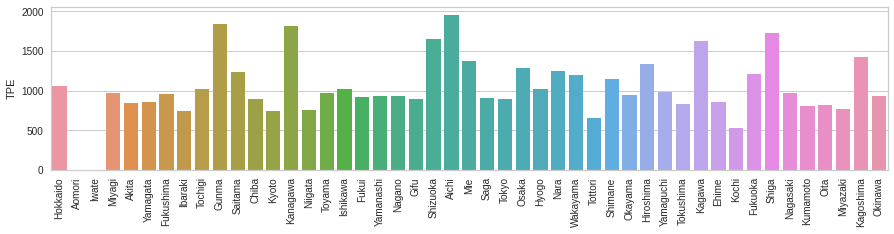

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['TPE'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

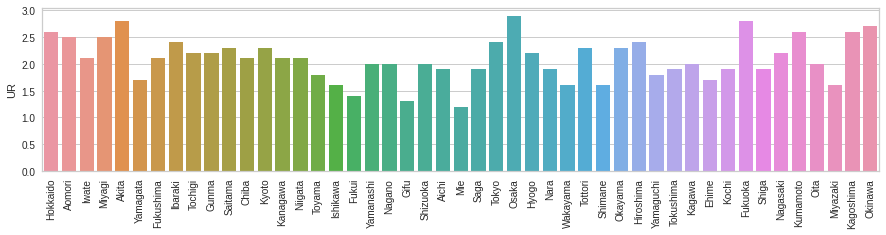

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['UR'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

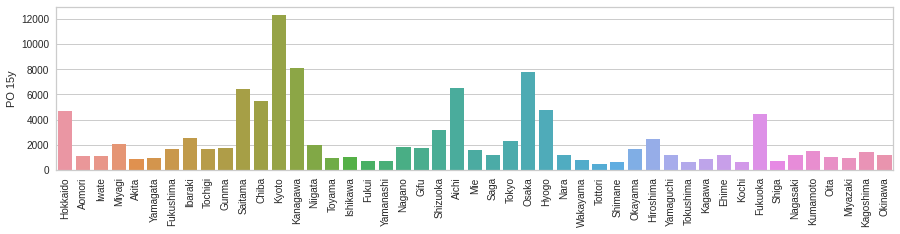

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['PO 15y'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

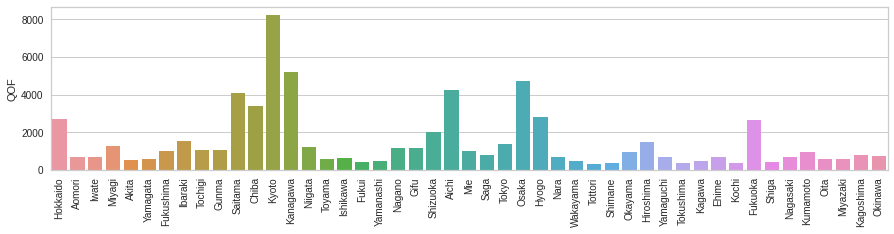

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['QOF'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

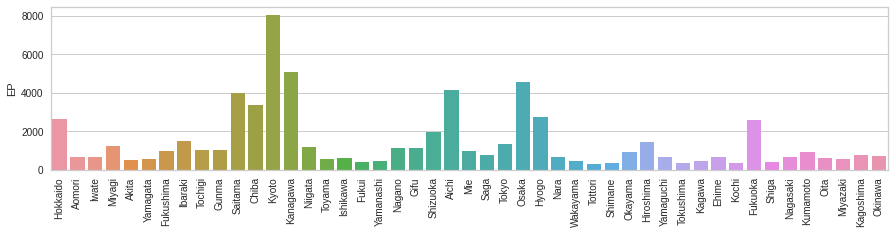

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['EP'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

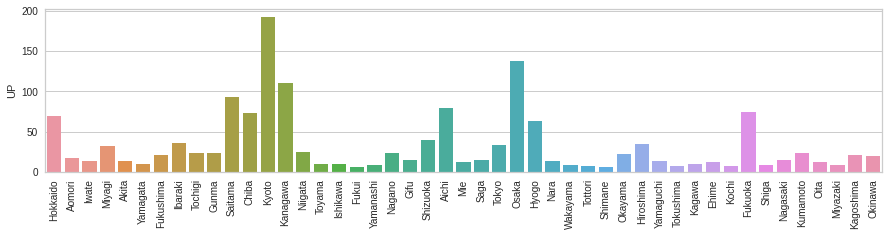

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['UP'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

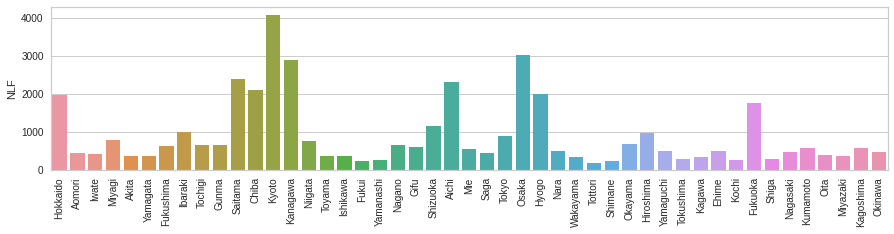

In [ ]:
plt.figure(figsize = (15,3))
g = sns.barplot(x = df.index, y = df['NLF'], data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

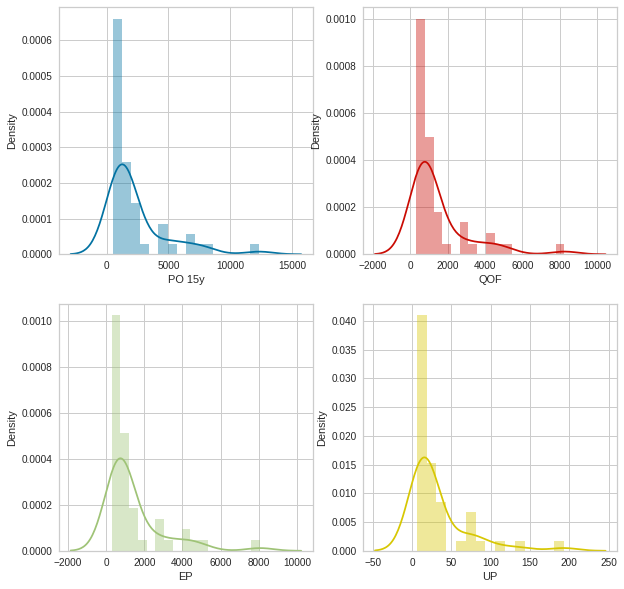

In [ ]:
#分佈分析
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.distplot(df['PO 15y'], ax=axs[0,0])
sns.distplot(df['QOF'], color = 'r', ax=axs[0,1])
sns.distplot(df['EP'], color = 'g', ax=axs[1,0])
sns.distplot(df['UP'], color = 'y', ax=axs[1,1])

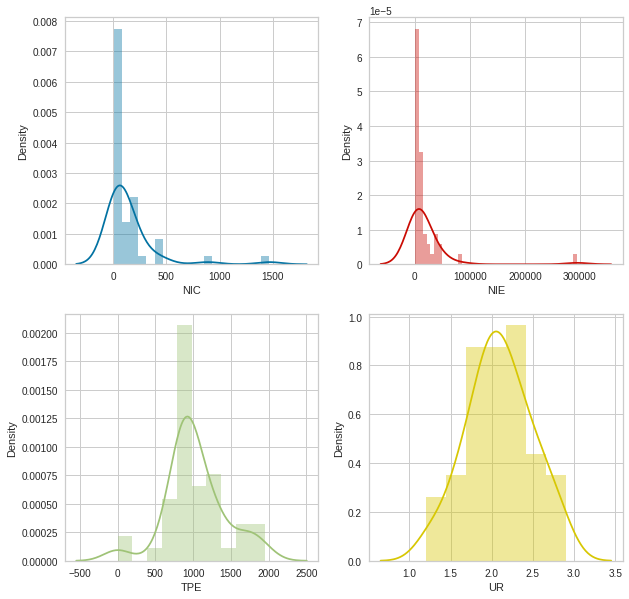

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.distplot(df['NIC'], ax=axs[0,0])
sns.distplot(df['NIE'], color = 'r', ax=axs[0,1])
sns.distplot(df['TPE'], color = 'g', ax=axs[1,0])
sns.distplot(df['UR'], color = 'y', ax=axs[1,1])

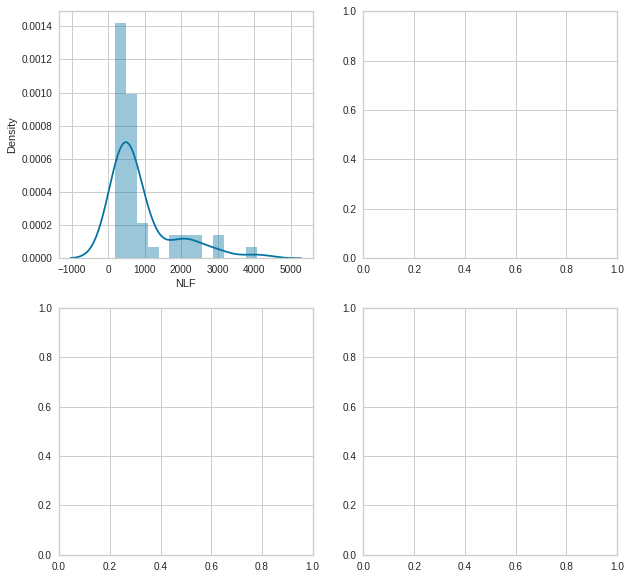

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.distplot(df['NLF'], ax=axs[0,0])

In [ ]:
# 使用夏皮羅檢驗法檢測正態性
# H0：分佈是正態的
# H1：分佈非正態
# Test Statistics 越趨近1擬和越好，P-value 小於0.05為非常態分佈
from scipy.stats import shapiro

In [ ]:
test_statistics, p_value = shapiro(df['NIC'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.5401172041893005
P-value:  6.44270747862663e-11


In [ ]:
test_statistics, p_value = shapiro(df['NIE'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.39082372188568115
P-value:  1.0635599389033357e-12


In [ ]:
test_statistics, p_value = shapiro(df['TPE'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.9212692379951477
P-value:  0.0036997543647885323


In [ ]:
test_statistics, p_value = shapiro(df['UR'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.9862270355224609
P-value:  0.847550630569458


In [ ]:
test_statistics, p_value = shapiro(df['PO 15y'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.6931801438331604
P-value:  1.2841806729113614e-08


In [ ]:
test_statistics, p_value = shapiro(df['QOF'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.6764898300170898
P-value:  6.690631160211069e-09


In [ ]:
test_statistics, p_value = shapiro(df['EP'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.6765434741973877
P-value:  6.704413024749556e-09


In [ ]:
test_statistics, p_value = shapiro(df['UP'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.6749120354652405
P-value:  6.2978258164037015e-09


In [ ]:
test_statistics, p_value = shapiro(df['NLF'])
print("Test Statistics: ", test_statistics)
print("P-value: ", p_value)

Test Statistics:  0.7177832126617432
P-value:  3.503979328911555e-08


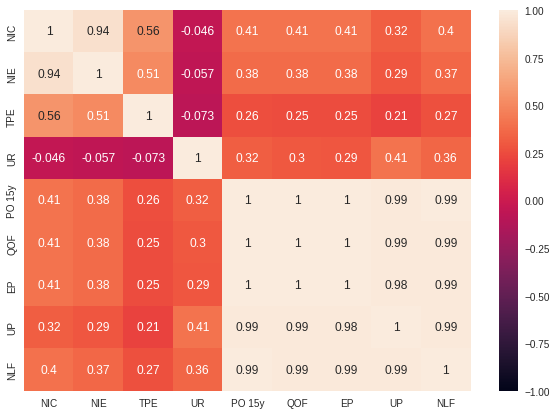

In [ ]:
# 特徵值之間的相關係數
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1);

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

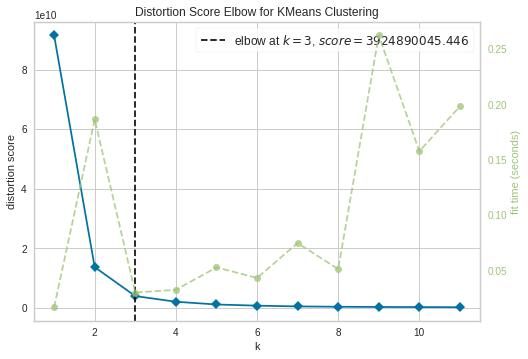

In [ ]:
#找到最佳的群聚數（群聚之間的最小相似度和群聚之間的最大相似度)
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (1,12))
visualizer.fit(df)
visualizer.poof()

In [ ]:
# 最終模型計算
# K均值分析，找到最佳群聚數為3個
# 群聚中心距離值越大表示分群效果越好
kmeans = KMeans(n_clusters = 3).fit(df)
print("Number of clusters: ", kmeans.n_clusters)
print("-"*70)
print("Cluster Centers: ", '\n', kmeans.cluster_centers_)

Number of clusters:  3
----------------------------------------------------------------------
Cluster Centers:  
 [[5.86486486e+01 5.78764865e+03 9.22118108e+02 2.10810811e+00
  1.97391892e+03 1.21589189e+03 1.18827027e+03 2.77297297e+01
  7.56432432e+02]
 [1.46700000e+03 2.94879000e+05 1.95700000e+03 1.90000000e+00
  6.55000000e+03 4.22700000e+03 4.14900000e+03 7.90000000e+01
  2.31700000e+03]
 [3.51000000e+02 4.23550000e+04 1.37166667e+03 2.05555556e+00
  3.48177778e+03 2.18677778e+03 2.13944444e+03 4.73333333e+01
  1.29211111e+03]]


In [ ]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

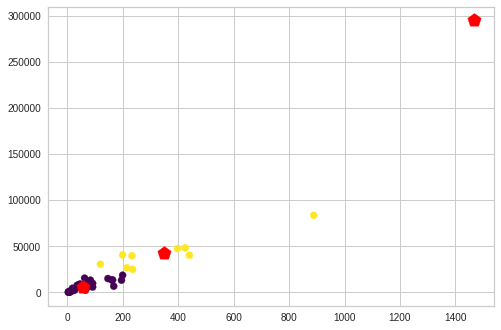

In [ ]:
# 繪製毎個群聚的中心點之距離
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = 'Red', s = 200, marker = 'p')


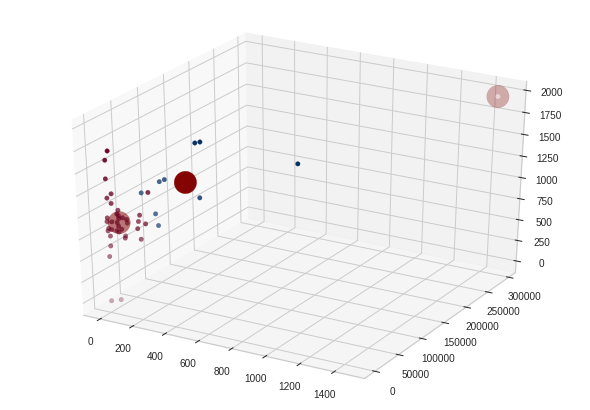

In [ ]:
# 將數據以3D圖顯示
fig = plt.figure()
ax = Axes3D(fig)
x = df.iloc[:,0]
y = df.iloc[:,1]
z = df.iloc[:,2]
ax.scatter(x, y, z, c = labels,  cmap = 'RdBu')
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c ="#840303", marker="o", s = 500);

In [ ]:
clustered_df = pd.DataFrame({'States': df.index,
                             'Clusters': labels})
clustered_df.head()

,States,Clusters
0,Hokkaido,0
1,Aomori,0
2,Iwate,0
3,Miyagi,0
4,Akita,0


In [ ]:
clustered_df.sort_values(by = 'Clusters')

,States,Clusters
0,Hokkaido,0
25,Tokyo,0
26,Osaka,0
27,Hyogo,0
28,Nara,0
29,Wakayama,0
30,Tottori,0
31,Shimane,0
32,Okayama,0
24,Saga,0
